In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})
np.random.seed(0)

In [2]:
m = 200 # signal length
n = 40 # message length
d = 4 # Signal possible values

H = np.random.randn(m, n)
x_true = np.random.choice([-3, -1, 1, 3], n)
v = np.random.rand(m)
y = H @ x_true + v

In [3]:
x = cp.Variable(n)
z = cp.Variable((n, d), boolean=True)
a = np.array([-3, -1, 1, 3])

objective = cp.Minimize(cp.norm(H @ x - y, 1))
constraints = [x[k] == a @ z[k, :] for k in range(n)]
    
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.GUROBI, verbose=True)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-04-24
Using license file /Users/bstellato/gurobi.lic
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 440 rows, 400 columns and 16600 nonzeros
Model fingerprint: 0x768e5504
Variable types: 240 continuous, 160 integer (160 binary)
Coefficient statistics:
  Matrix range     [7e-05, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e-03, 3e+01]
Found heuristic solution: objective 2116.4312582
Found heuristic solution: objective 2116.4312525
Presolve removed 40 rows and 160 columns
Presolve time: 0.01s
Presolved: 400 rows, 240 columns, 16400 

92.60995499837742

In [4]:
x.value

array([-1.,  3., -1.,  1.,  3., -1., -1.,  3.,  1.,  1.,  3.,  1., -3.,
       -3.,  1.,  3.,  1.,  3., -3.,  3.,  3.,  3.,  3.,  1.,  1., -1.,
       -3., -3., -3.,  3., -3.,  1.,  1.,  3., -3., -3.,  3.,  1., -1.,
        1.])

In [5]:
x_true

array([-1,  3, -1,  1,  3, -1, -1,  3,  1,  1,  3,  1, -3, -3,  1,  3,  1,
        3, -3,  3,  3,  3,  3,  1,  1, -1, -3, -3, -3,  3, -3,  1,  1,  3,
       -3, -3,  3,  1, -1,  1])

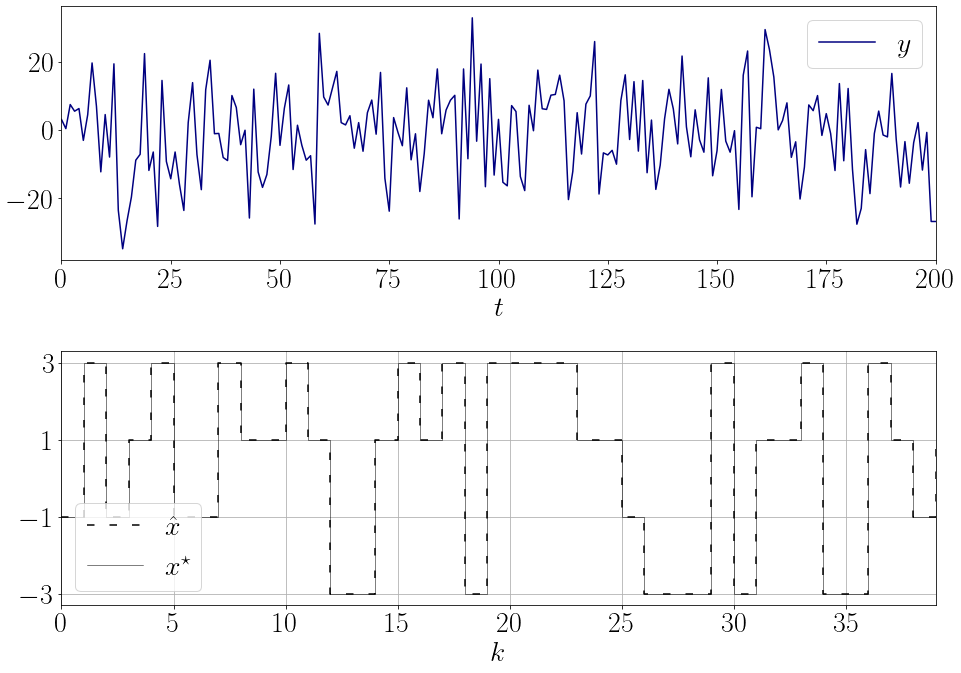

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
ax[0].plot(np.arange(m), y, color='navy', label=r'$y$')
ax[0].legend()
ax[0].set_xlabel(r"$t$")
ax[0].set_xlim([0, m])
ax[1].step(np.arange(n), x_true, where='post', color='k', linestyle=(0, (5, 10)), linewidth=1.5, label=r'$\hat{x}$')
ax[1].step(np.arange(n), x.value, where='post', color='k', linestyle="solid", linewidth=0.5, label=r'$x^\star$')
ax[1].set_xlabel(r"$k$")
ax[1].set_xlim([0, n-1])
ax[1].set_yticks(a)
ax[1].grid()
ax[1].legend(loc="lower left")
plt.tight_layout()
plt.savefig("signal_decoding.pdf")